In [1]:
import numpy as np # NumPy is the fundamental package for scientific computing

import pandas as pd # Pandas is an easy-to-use data structures and data analysis tools
pd.set_option('display.max_columns', None) # To display all columns

import matplotlib.pyplot as plt # Matplotlib is a python 2D plotting library
%matplotlib inline 
# A magic command that tells matplotlib to render figures as static images in the Notebook.

import seaborn as sns # Seaborn is a visualization library based on matplotlib (attractive statistical graphics).
sns.set_style('whitegrid') # One of the five seaborn themes
import warnings
warnings.filterwarnings('ignore') # To ignore some of seaborn warning msg

from scipy import stats

from sklearn import linear_model # Scikit learn library that implements generalized linear models
from sklearn import neighbors # provides functionality for unsupervised and supervised neighbors-based learning methods
from sklearn.metrics import mean_squared_error # Mean squared error regression loss
from sklearn import preprocessing # provides functions and classes to change raw feature vectors
from sklearn.cross_validation import train_test_split
from sklearn.externals import joblib

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from math import log

LABEL = 'cur_cpd'



/Users/mengan/test/env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


cur_hour           int64
cur_price        float64
cur_cpd          float64
cur_price_2      float64
cur_price_log    float64
cur_hour_2         int64
cost_level#0       uint8
cost_level#1       uint8
cost_level#2       uint8
cost_level#3       uint8
cost_level#4       uint8
cost_level#5       uint8
dtype: object
Model save, ['model/b33e77f31fe04969803d8c93eee90701.pkl']
[[ 1.86]
 [ 0.65]
 [ 0.98]
 [ 1.7 ]
 [ 0.66]
 [ 0.38]
 [ 1.54]
 [ 1.37]
 [ 0.62]
 [ 2.24]
 [ 1.57]
 [ 1.21]
 [ 1.79]
 [ 2.17]
 [ 0.59]
 [ 1.11]
 [ 0.91]
 [ 0.4 ]
 [ 0.36]
 [ 1.17]
 [ 2.2 ]
 [ 1.06]
 [ 1.14]
 [ 0.95]
 [ 2.5 ]
 [ 1.87]
 [ 1.45]
 [ 0.86]
 [ 0.62]
 [ 0.5 ]
 [ 0.97]
 [ 1.35]
 [ 0.9 ]
 [ 2.18]
 [ 1.84]
 [ 1.31]
 [ 1.6 ]
 [ 1.24]
 [ 0.7 ]
 [ 0.32]
 [ 0.92]
 [ 1.45]
 [ 1.68]
 [ 2.62]
 [ 0.91]
 [ 1.37]
 [ 2.57]
 [ 0.99]
 [ 4.22]
 [ 1.  ]
 [ 0.57]
 [ 0.67]
 [ 1.57]
 [ 0.68]
 [ 1.79]
 [ 2.33]
 [ 1.2 ]
 [ 0.42]
 [ 1.33]
 [ 0.32]
 [ 1.28]
 [ 0.7 ]
 [ 1.56]
 [ 0.83]
 [ 2.69]
 [ 0.93]
 [ 1.57]
 [ 0.86]
 [ 0.82]
 [ 0.3

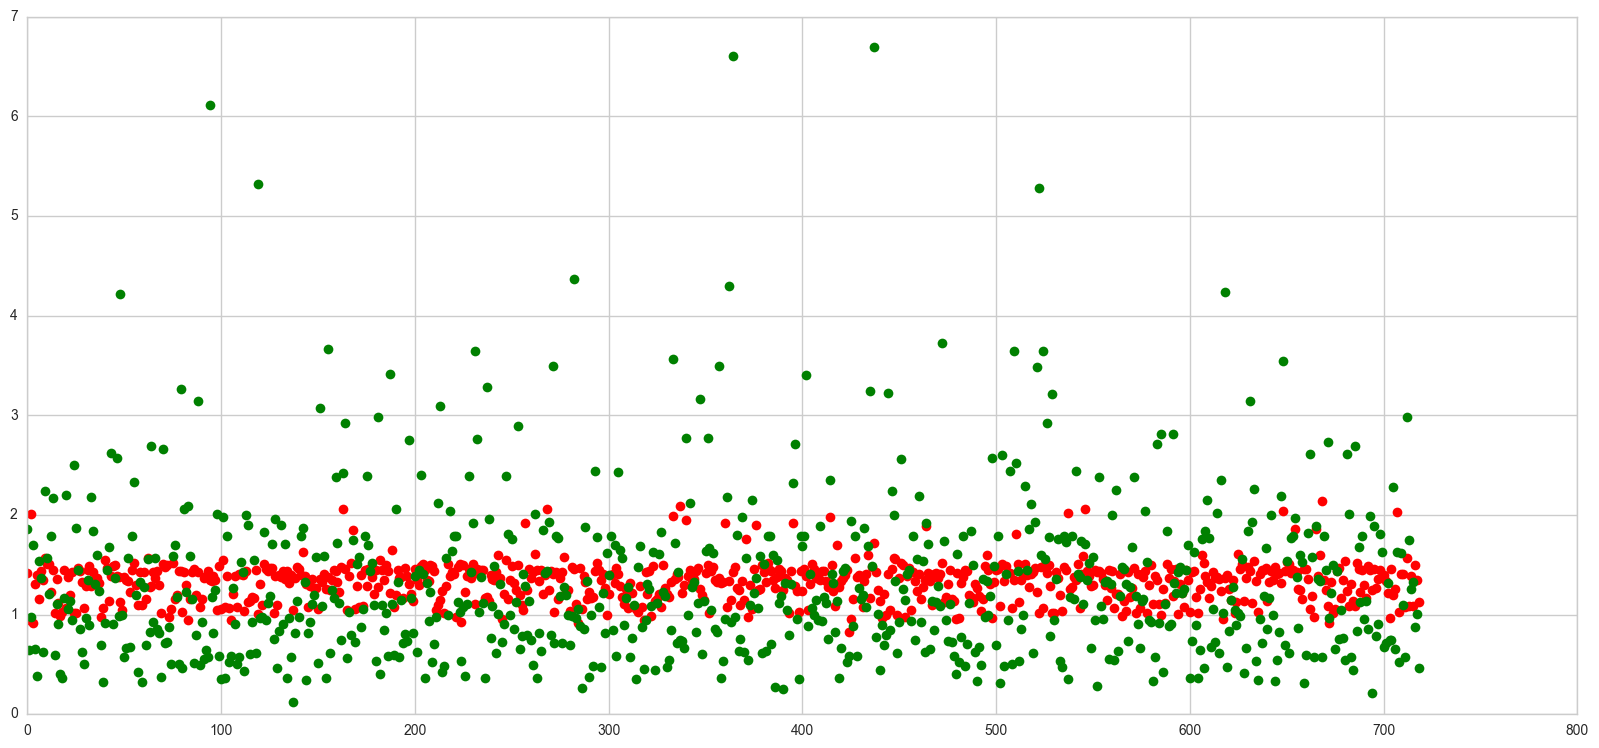

Train Finished, RMSE-0.817681056725
[1, 0.74, 0.5476, -0.3011050927839216, 1, 0, 0, 0, 0, 1, 0]
[[ 0.94775629]]


/Users/mengan/test/env/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [2]:
# A function that take one input of the dataset and return the RMSE (of the test data), and the intercept and coefficient
def simple_linear_model(train, test, input_feature):
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train.as_matrix(columns = [input_feature]), train.as_matrix(columns = [LABEL])) # Train the model
    RMSE = mean_squared_error(test.as_matrix(columns = [LABEL]), 
                              regr.predict(test.as_matrix(columns = [input_feature])))**0.5 # Calculate the RMSE on test data
    return RMSE, regr.intercept_[0], regr.coef_[0][0]

# A function that take multiple features as input and return the RMSE (of the test data), and the  intercept and coefficients
def multiple_regression_model(train, test, input_features):
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train.as_matrix(columns = input_features), train.as_matrix(columns = [LABEL])) # Train the model
    RMSE = mean_squared_error(test.as_matrix(columns = [LABEL]), 
                              regr.predict(test.as_matrix(columns = input_features)))**0.5 # Calculate the RMSE on test data
    return RMSE, regr.intercept_[0], regr.coef_ 

# A function that take multiple features as input and return the RMSE (of the train and validation data)
def RMSE(train, validation, features, new_input):
    features_list = list(features)
    features_list.append(new_input)
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train.as_matrix(columns = features_list), train.as_matrix(columns = [LABEL])) # Train the model
    RMSE_train = mean_squared_error(train.as_matrix(columns = [LABEL]), 
                              regr.predict(train.as_matrix(columns = features_list)))**0.5 # Calculate the RMSE on train data
    RMSE_validation = mean_squared_error(validation.as_matrix(columns = [LABEL]), 
                              regr.predict(validation.as_matrix(columns = features_list)))**0.5 # Calculate the RMSE on train data
    return RMSE_train, RMSE_validation 

def show_result(ori,pre):
    s_ori = []
    s_pre = []

    count = len(ori)
    ax = range(0,count)
    i = 0
    while i < count:
        s_ori.append(ori[i][0])
        s_pre.append(pre[i][0])
        i += 1
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 20
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    l_ori = plt.plot(ax, s_ori,'or')
    l_pre = plt.plot(ax, s_pre,'og')
    plt.show()
    return

def train_appid(appid):
    data = pd.read_csv("data/%s_merge.csv" % appid) # load the data into a pandas dataframe
    data = data[data['cur_cpd'] > 0]
    data = data[data['cur_cpd'] < 10]

    data.drop(['kid', 'cur_time','cur_rank1_rate','cur_profit'], axis = 1, inplace = True)

    data['cur_price_2'] = data['cur_price'].apply(lambda x: x**2) 
    data['cur_price_log'] = data['cur_price'].apply(lambda x: log(x))
    data['cur_hour_2'] = data['cur_hour'].apply(lambda x: x**2) 

    cc = 'cost_level'
    dummies = pd.get_dummies(data[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    data.drop(cc, axis=1, inplace=True)
    data = data.join(dummies)

    print(data.dtypes)
    #print(data.head(1))

    train_data, test_data = train_test_split(data, train_size = 0.8, random_state = 10)
    input_list = train_data.columns.values.tolist() # list of column name
    input_list.remove(LABEL)

    # for simple linear model, debug
    if False:
        input_list = data.columns.values.tolist() # list of column name
        input_list.remove(LABEL)
        simple_linear_result = pd.DataFrame(columns = ['feature', 'RMSE', 'intercept', 'coefficient'])

        # loop that calculate the RMSE of the test data for each input 
        for p in input_list:
            RMSE, w1, w0 = simple_linear_model(train_data, test_data, p)
            simple_linear_result = simple_linear_result.append({'feature':p, 'RMSE':RMSE, 'intercept':w0, 'coefficient': w1}
                                                       ,ignore_index=True)
        simple_linear_result.sort_values('RMSE') # display the 10 best estimators

    # debug
    if False:
        # list of features included in the regression model and the calculated train and validation errors (RMSE)
        regression_greedy_algorithm = pd.DataFrame(columns = ['feature', 'train_error', 'validation_error'])  
        i = 0
        temp_list = []

        # a while loop going through all the features in the dataframe
        while i < len(train_data.columns)-1:
    
            # a temporary dataframe to select the best feature at each iteration
            temp = pd.DataFrame(columns = ['feature', 'train_error', 'validation_error'])
    
            # a for loop to test all the remaining features
            for p in input_list:
                RMSE_train, RMSE_validation = RMSE(train_data, test_data, temp_list, p)
                temp = temp.append({'feature':p, 'train_error':RMSE_train, 'validation_error':RMSE_validation}, ignore_index=True)
        
            temp = temp.sort_values('train_error') # select the best feature using train error
            best = temp.iloc[0,0]
            temp_list.append(best)
            regression_greedy_algorithm = regression_greedy_algorithm.append({'feature': best, 
                                                  'train_error': temp.iloc[0,1], 'validation_error': temp.iloc[0,2]}, 
                                                 ignore_index=True) # add the feature to the dataframe
            input_list.remove(best) # remove the best feature from the list of available features
            i += 1
        print(regression_greedy_algorithm)
    
    # main func
    features_list = input_list
    
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train_data.as_matrix(columns = features_list), train_data.as_matrix(columns = [LABEL])) # Train the model
    
    RMSE = mean_squared_error(test_data.as_matrix(columns = [LABEL]), 
                              regr.predict(test_data.as_matrix(columns = features_list)))**0.5 # Calculate the RMSE on test data
    if True:
        r = joblib.dump(regr, 'model/%s.pkl' % appid) 
        print('Model save,',r)
        
    a = regr.predict(test_data.as_matrix(columns = features_list))
    b = test_data.as_matrix(columns = [LABEL])
    req = test_data.as_matrix(columns = features_list)
    print(b)
    if True:
        show_result(a,b)
    print('Train Finished, RMSE-%s' % RMSE)
    
def predict_appid(appid, req):
    pres = []
    
    pre = []
    pre.append(req['cur_hour'])
    pre.append(req['cur_price'])
    pre.append(req['cur_price'] * req['cur_price'])
    pre.append(log(req['cur_price']))
    pre.append(req['cur_hour'] * req['cur_hour'])
    
    for i in range(0,6):
        if i == req['cost_level']:
            pre.append(1)
        else:
            pre.append(0)
    print(pre)
    
    mm = joblib.load('model/%s.pkl' % appid)
    
    pre_r = mm.predict(pre)
    #print(pre_r)
    #b = test_data.as_matrix(columns = [LABEL])
    
    #req = test_data.as_matrix(columns = features_list)
    #print(req[0])
    
train_appid("b33e77f31fe04969803d8c93eee90701")

req = {}
req['cur_hour'] = 1
req['cur_price'] = 0.74
req['cost_level'] = 4
predict_appid("b33e77f31fe04969803d8c93eee90701", req)        